In [622]:
import os
import torch
import yaml
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from dataloader import PixelDataLoader
from model import VAEModel, GANModel

In [623]:
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image).astype(np.float32)
    return image

def remove_step_model():
    for file in os.listdir('models'):
        if "epoch" in file:
            print("Remove:", file)
            os.remove(os.path.join('models', file))

def plot_image(image):
    fig = plt.figure(figsize=(5, 5), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    plt.axis('off')
    plt.xlim(0, 300)
    plt.ylim(300, 0)
    plt.imshow(image / 255)
    plt.show()
    
def plot_samples(samples):
    fig = plt.figure(figsize=(5, 5), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    plt.axis('off')
    plt.xlim(0, 300)
    plt.ylim(300, 0)
    plt.scatter(samples[:, 1], samples[:, 0], c=samples[:, 2:5] / 255, s=1)
    plt.show()

In [631]:
remove_step_model()

Remove: generator_epoch_290.pth
Remove: generator_epoch_130.pth
Remove: discriminator_epoch_140.pth
Remove: discriminator_epoch_70.pth
Remove: generator_epoch_250.pth
Remove: discriminator_epoch_220.pth
Remove: generator_epoch_70.pth
Remove: discriminator_epoch_180.pth
Remove: discriminator_epoch_190.pth
Remove: generator_epoch_60.pth
Remove: discriminator_epoch_230.pth
Remove: generator_epoch_240.pth
Remove: discriminator_epoch_60.pth
Remove: discriminator_epoch_150.pth
Remove: generator_epoch_120.pth
Remove: generator_epoch_280.pth
Remove: discriminator_epoch_10.pth
Remove: generator_epoch_230.pth
Remove: discriminator_epoch_240.pth
Remove: generator_epoch_190.pth
Remove: generator_epoch_10.pth
Remove: discriminator_epoch_280.pth
Remove: generator_epoch_150.pth
Remove: discriminator_epoch_120.pth
Remove: discriminator_epoch_130.pth
Remove: generator_epoch_140.pth
Remove: discriminator_epoch_290.pth
Remove: generator_epoch_180.pth
Remove: discriminator_epoch_250.pth
Remove: generator_

In [625]:
with open('config.yaml', 'r') as file:
    CONFIG = yaml.safe_load(file)
x_pos = np.load(CONFIG['data_path']['x_pos'])
y_pos = np.load(CONFIG['data_path']['y_pos'])
image = load_image(CONFIG['data_path']['image'])
with open(CONFIG['data_path']['output_samples'], 'rb') as f:
    samples = np.load(f)
samples[:, 2:5] = np.clip(samples[:, 2:5], 0, 255)

# Plot Sample points

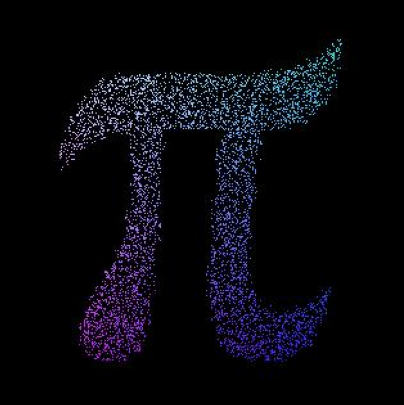

In [626]:
plot_image(image)

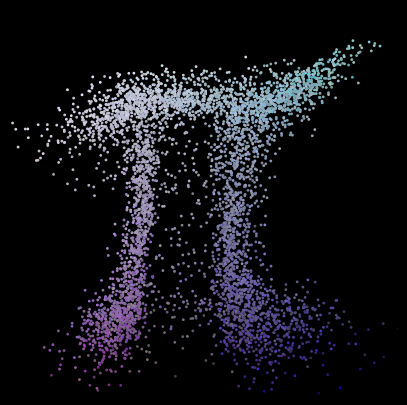

In [627]:
plot_samples(samples)

# Sample from model

In [628]:
p_loader = PixelDataLoader(
    CONFIG['data_path']['x_pos'], 
    CONFIG['data_path']['y_pos'],
    CONFIG['data_path']['image'],)
p_loader.standardize()
DEVICE = torch.device(CONFIG['hyperparameter']['device'])

if CONFIG['model']['type'] == 'vae':
    model = VAEModel(
        input_dim=CONFIG['model']['input_dim'],
        hidden_dim=CONFIG['model']['hidden_dim'],
        latent_dim=CONFIG['model']['latent_dim']
    )
elif CONFIG['model']['type'] == 'gan':
    model = GANModel(
        latent_dim=CONFIG['model']['latent_dim'],
        input_dim=CONFIG['model']['input_dim'],
        hidden_dim=CONFIG['model']['hidden_dim'],
        dg_ratio=CONFIG['model']['dg_ratio']
    ) 


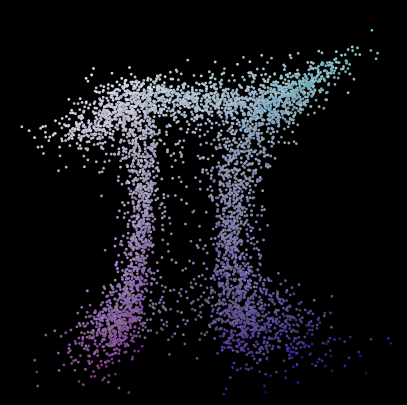

In [629]:
if CONFIG['model']['type'] == 'vae':
    load_state_paths = {
        'vae': f'models/best_vae.pth',
    }
elif CONFIG['model']['type'] == 'gan':
    load_state_paths = {
        # 'generator': f'models/best_generator.pth',
        # 'discriminator': f'models/best_discriminator.pth',
        'generator': f'models/final_generator.pth',
        'discriminator': f'models/final_discriminator.pth',
    }

model.load_state(load_state_paths)
# Sample the points and save the results
samples = model.sample(num_samples=CONFIG['hyperparameter']['num_samples'], device=DEVICE)
samples = p_loader.destandardize(samples)
samples[:, 2:5] = np.clip(samples[:, 2:5], 0, 255)

plot_samples(samples)

===== Epoch 10 =====


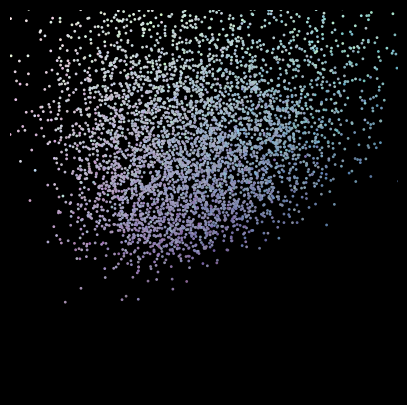

===== Epoch 60 =====


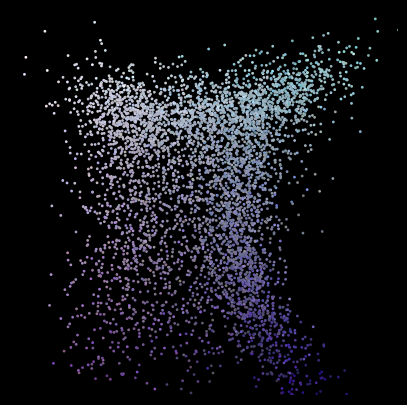

===== Epoch 110 =====


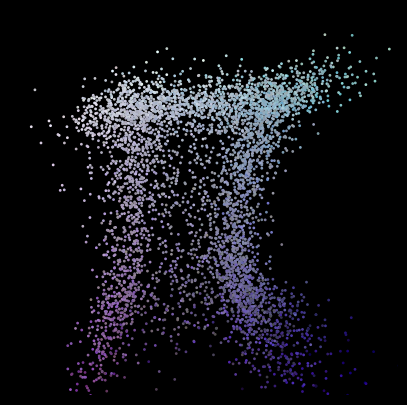

===== Epoch 160 =====


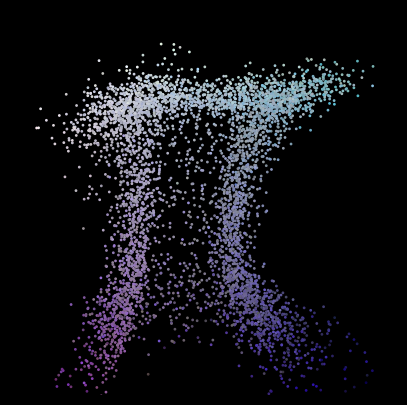

===== Epoch 210 =====


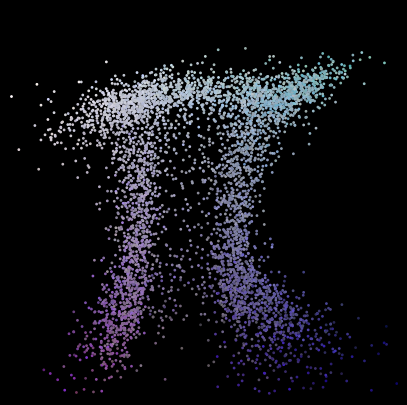

===== Epoch 260 =====


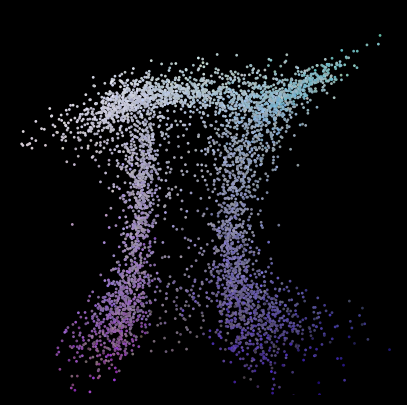

In [630]:
for i in range(10, 301, 50):
    if CONFIG['model']['type'] == 'vae':
        load_state_paths = {
            'vae': f'models/vae_epoch_{i}.pth',
        }
    elif CONFIG['model']['type'] == 'gan':
        load_state_paths = {
            'generator': f'models/generator_epoch_{i}.pth',
            'discriminator': f'models/discriminator_epoch_{i}.pth',
        }
    model.load_state(load_state_paths)
    # Sample the points and save the results
    samples = model.sample(num_samples=CONFIG['hyperparameter']['num_samples'], device=DEVICE)
    samples = p_loader.destandardize(samples)
    samples[:, 2:5] = np.clip(samples[:, 2:5], 0, 255)

    print('===== Epoch', i, '=====')
    plot_samples(samples)
    